# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [2]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
income = df_hh_income.shape
poverty = df_pct_poverty.shape
hs = df_pct_completed_hs.shape
race = df_share_race_city.shape
fatalities = df_fatalities.shape

In [5]:
print('df_hh_income shape: ', income)
print('df_pct_poverty shape: ', poverty)
print('df_pct_completed_hs shape: ', hs)
print('df_share_race_city shape: ', race)

df_hh_income shape:  (29322, 3)
df_pct_poverty shape:  (29329, 3)
df_pct_completed_hs shape:  (29329, 3)
df_share_race_city shape:  (29268, 7)


In [7]:
print(f'Income : {df_hh_income.columns}')
print(f'Poverty : {df_pct_poverty.columns}')
print(f'PCT : {df_pct_completed_hs.columns}')
print(f'Shares : {df_share_race_city.columns}')

Income : Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Poverty : Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
PCT : Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Shares : Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


In [ ]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income = df_hh_income.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_share_race_city = df_share_race_city.fillna(0)
df_fatalities = df_fatalities.fillna(0)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

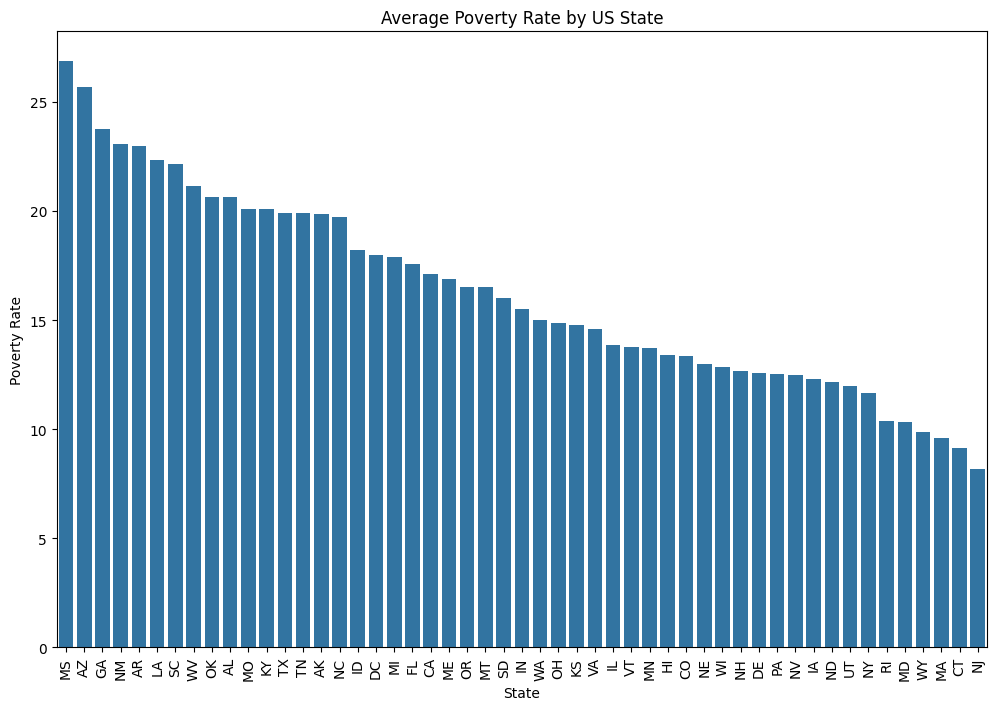

In [13]:
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=state_poverty.index, y=state_poverty.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Poverty Rate')
plt.title('Average Poverty Rate by US State')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
  df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [9]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

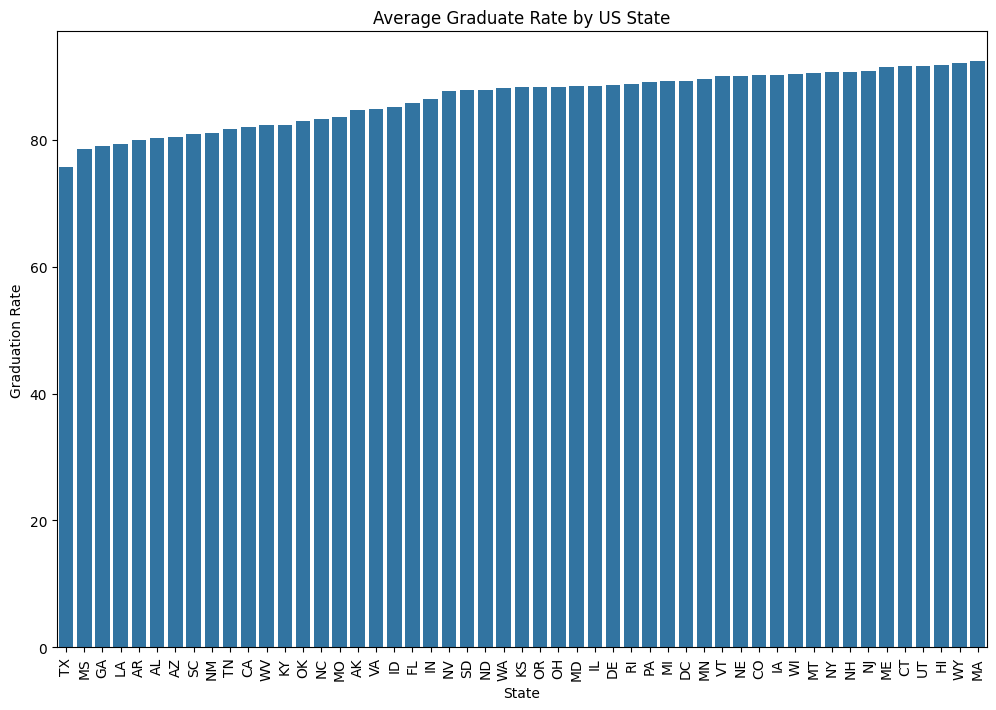

In [10]:
pct_completed = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=pct_completed.index, y=pct_completed.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Graduation Rate')
plt.title('Average Graduate Rate by US State')
plt.show()

In [14]:
pct_completed = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True)
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=True)



# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

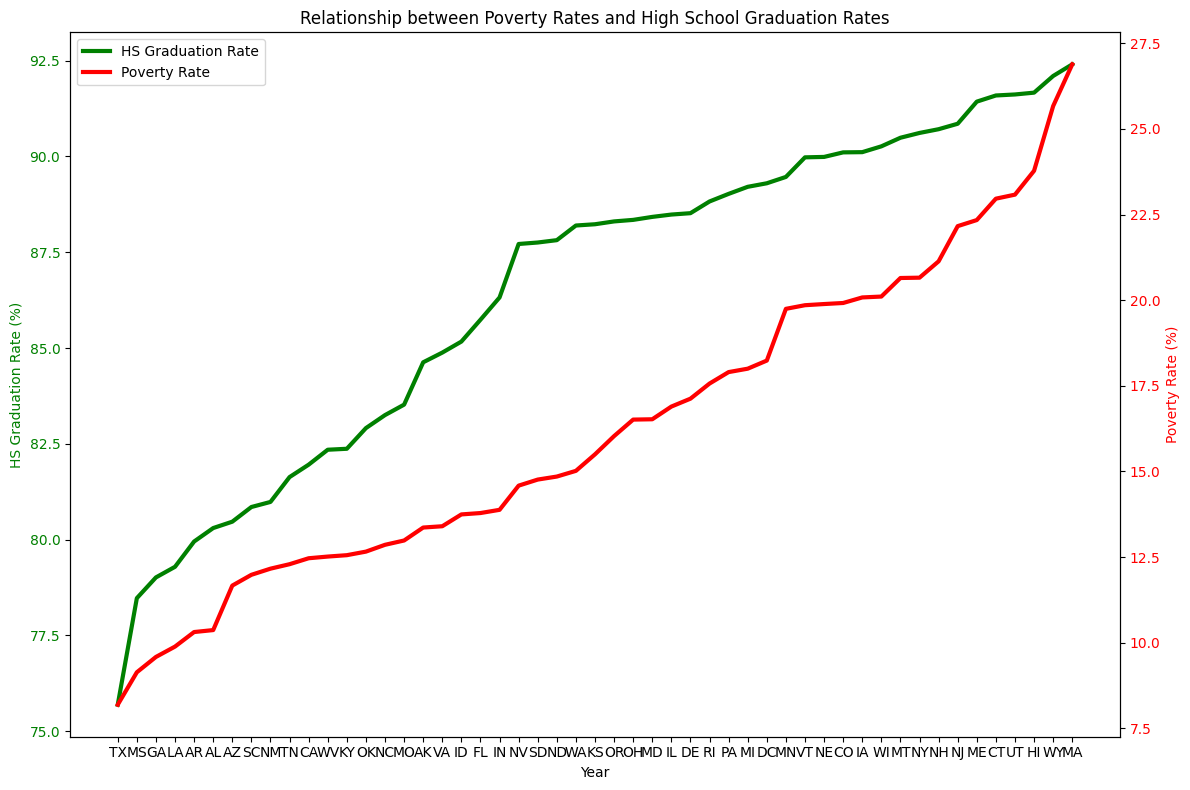

In [15]:
# Create a figure
plt.figure(figsize=(12, 8), dpi=100)

# Set plot title
plt.title("Relationship between Poverty Rates and High School Graduation Rates")

# Create first y-axis (left)
ax1 = plt.gca()

# Create second y-axis (right), sharing the same x-axis
ax2 = ax1.twinx()

# Plot High School Graduation Rate on ax1
line1 = ax1.plot(pct_completed.index, pct_completed.values,
                 color='green', linewidth=3, label="HS Graduation Rate")

# Plot Poverty Rate on ax2
line2 = ax2.plot(pct_completed.index, state_poverty.values,
                 color='red', linewidth=3, label="Poverty Rate")

# Set axis labels
ax1.set_ylabel("HS Graduation Rate (%)", color='green')
ax2.set_ylabel("Poverty Rate (%)", color='red')
ax1.set_xlabel("Year")

# Color the ticks to match line colors
ax1.tick_params(axis='y', labelcolor='green')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

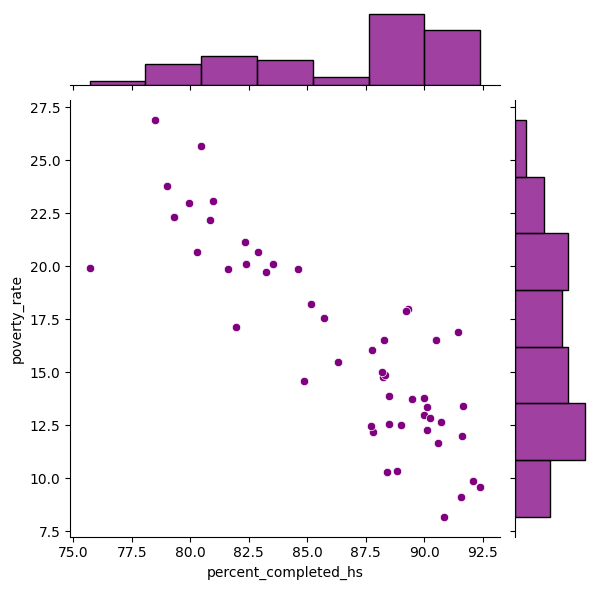

In [ ]:
sns.jointplot(x=pct_completed, y = state_poverty, kind='scatter', color='purple')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

In [ ]:
state_poverty.head()

,poverty_rate
Geographic Area,
NJ,8.19
CT,9.14
MA,9.59
WY,9.89
MD,10.31


In [ ]:

pct_completed = pct_completed.to_frame()
state_poverty = state_poverty.to_frame()
df_combined = pct_completed.merge(state_poverty, on=['Geographic Area'])

# Check the result
print(df_combined.head())

                 percent_completed_hs  poverty_rate
Geographic Area                                    
TX                              75.69         19.92
MS                              78.47         26.88
GA                              79.01         23.78
LA                              79.29         22.34
AR                              79.95         22.96


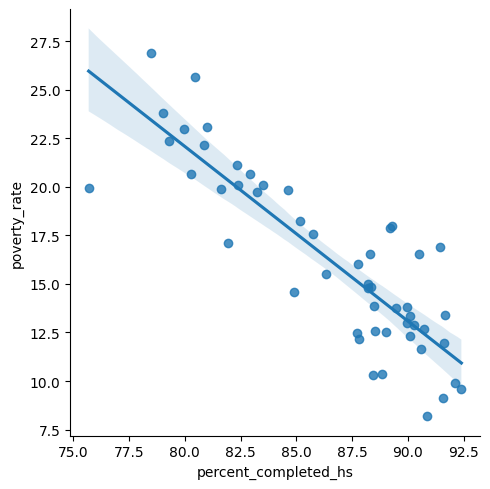

In [ ]:
sns.lmplot(x = "percent_completed_hs", y = "poverty_rate", data=df_combined)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [16]:
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')


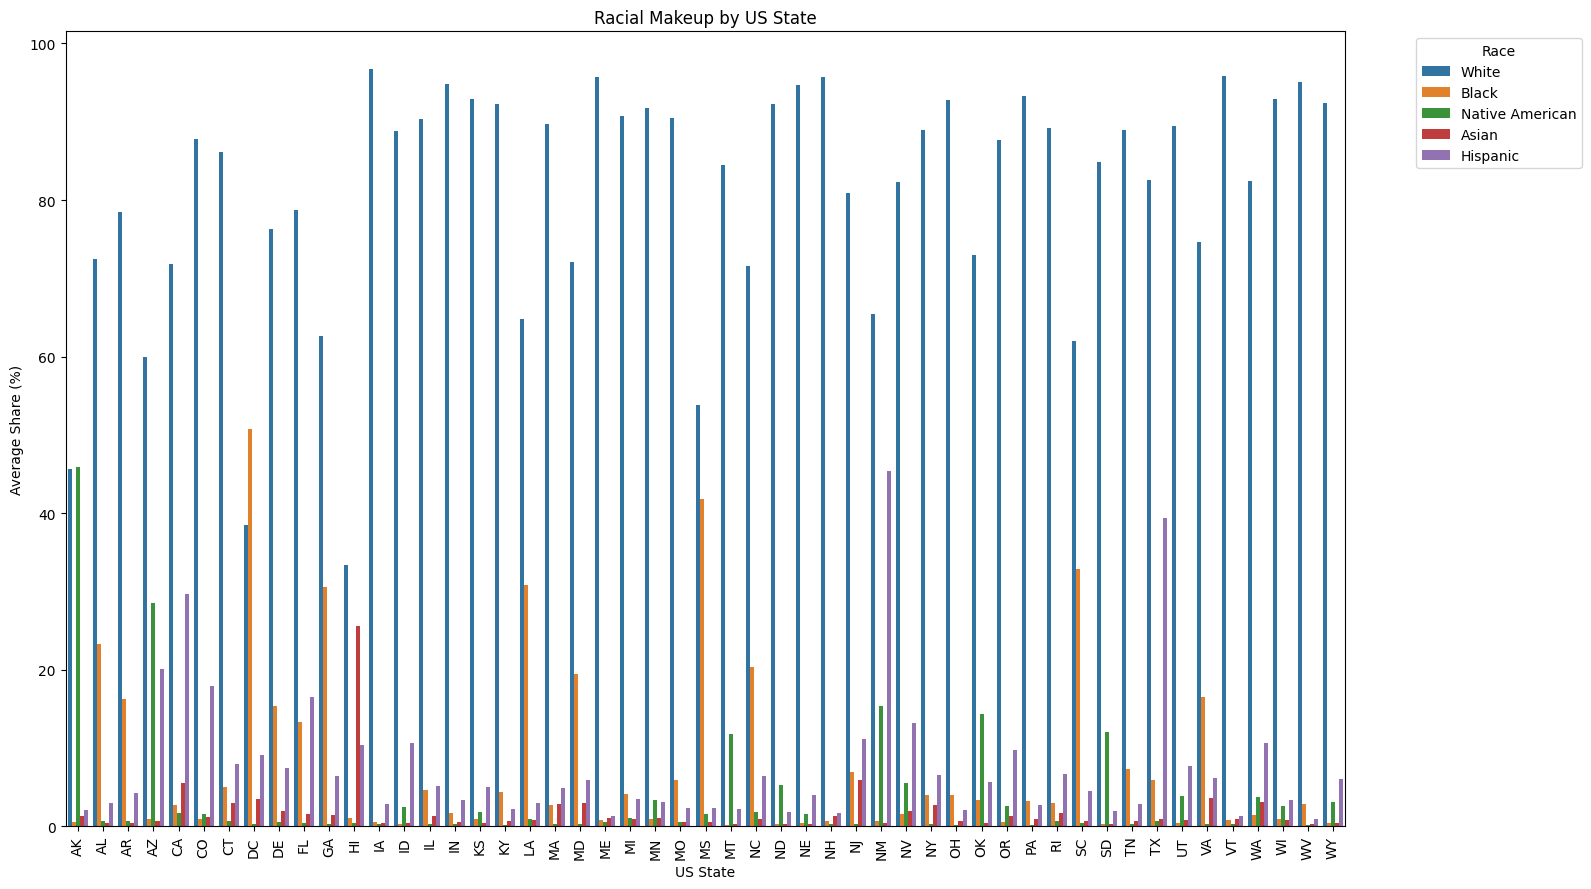

In [ ]:
pct_completed = df_share_race_city.groupby('Geographic area')[
    ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
].mean().reset_index()

# Step 2: Melt the DataFrame for seaborn plotting
df_melted = pct_completed.melt(id_vars='Geographic area',
                               var_name='Race',
                               value_name='Share')

# Step 3: Clean up race labels
df_melted['Race'] = df_melted['Race'].str.replace('share_', '').str.replace('_', ' ').str.title()

# Step 4: Plot with seaborn barplot
plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Geographic area', y='Share', hue='Race')

# Customize plot
plt.title('Racial Makeup by US State')
plt.xlabel('US State')
plt.ylabel('Average Share (%)')
plt.xticks(rotation=90)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
klr = df_fatalities.groupby('race') \
    .agg(fatality_count=('race', 'count')) \
    .sort_values(by='fatality_count', ascending=True)

In [ ]:
klr.head()

,fatality_count
race,
0,195
A,39
B,618
H,423
N,31


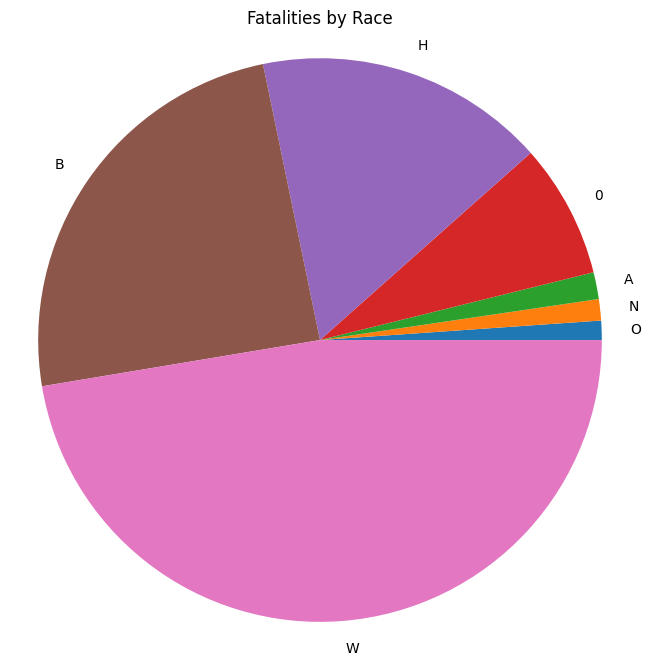

In [ ]:
import matplotlib.pyplot as plt

# Assuming klr is a DataFrame with 'race' as index and 'fatality_count' as a column
plt.figure(figsize=(8, 8))
plt.pie(klr['fatality_count'], labels=klr.index)

plt.title('Fatalities by Race')
plt.axis('equal')  # Ensures the pie is circular
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [17]:
death_gender = df_fatalities.groupby('gender') \
    .agg(fatality_count=('gender', 'count')) \
    .sort_values(by='fatality_count', ascending=True)

In [18]:
death_gender.head()

,fatality_count
gender,
F,107
M,2428


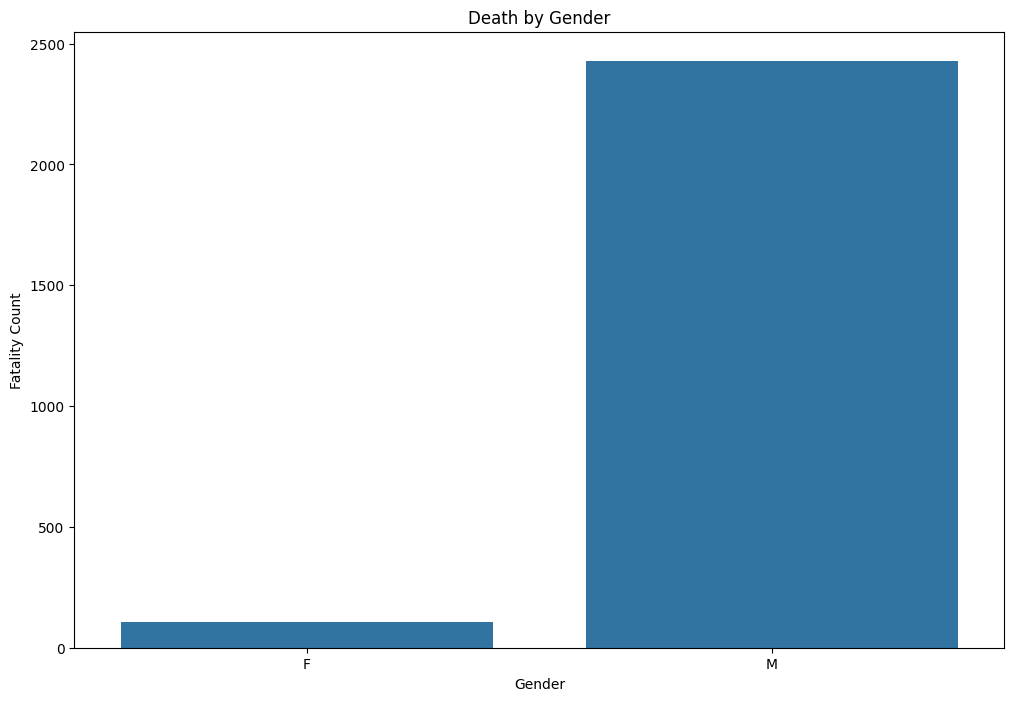

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x=death_gender.index, y=death_gender["fatality_count"])
plt.xlabel('Gender')
plt.ylabel('Fatality Count')
plt.title('Death by Gender')
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [20]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [32]:
data_death_type = df_fatalities.groupby(['gender', 'manner_of_death']).agg(count=('manner_of_death', 'count')).reset_index()

In [35]:
data_death_type

,gender,manner_of_death,count
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


/tmp/ipython-input-1000835961.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_death_type[data_death_type['gender'] == g]['count'] for g in data_death_type['gender'].unique()], labels=data_death_type['gender'].unique())


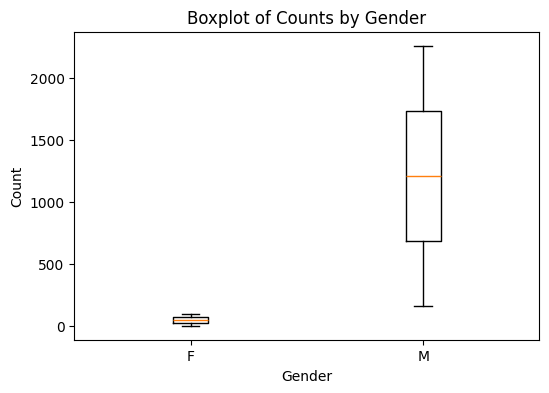

In [39]:

plt.figure(figsize=(6,4))
plt.boxplot([data_death_type[data_death_type['gender'] == g]['count'] for g in data_death_type['gender'].unique()], labels=data_death_type['gender'].unique())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Boxplot of Counts by Gender')
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [40]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [17]:
armed_data = df_fatalities.groupby('armed').agg(count=('armed', 'count')).reset_index()

In [18]:
armed_data

,armed,count
0,Taser,9
1,air conditioner,1
2,ax,9
3,baseball bat,8
4,baseball bat and bottle,1
...,...,...
63,toy weapon,104
64,unarmed,171
65,undetermined,117
66,unknown weapon,18


In [19]:
armed_status = armed_data['armed'].apply(lambda x: 'Unarmed' if x == 'unarmed' else 'Armed')

In [20]:
armed_status = armed_status.groupby(armed_status).count()
armed_status

,armed
armed,
Armed,67
Unarmed,1


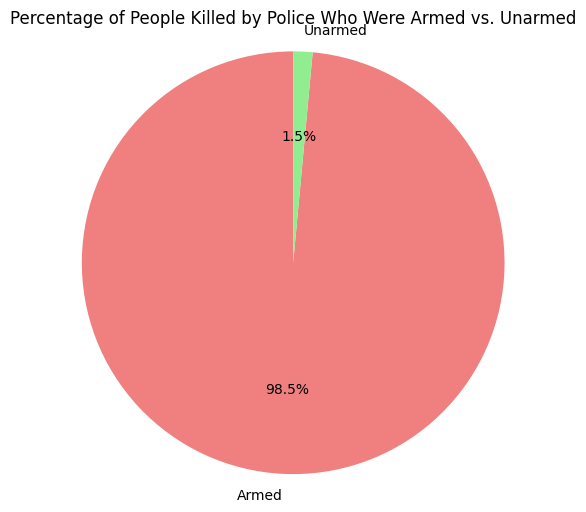

In [22]:
plt.figure(figsize=(6,6))
plt.pie(armed_status, labels=armed_status.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of People Killed by Police Who Were Armed vs. Unarmed')
plt.axis('equal')
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [25]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

In [37]:
armed_old = df_fatalities.groupby('age').agg(count=('age', 'count')).reset_index()
ages_data = armed_old['age'].apply(lambda x: 'Below 25' if x < 25 else '25 above')

In [38]:
ages_data = ages_data.groupby(ages_data).count()
ages_data

,age
age,
25 above,59
Below 25,14


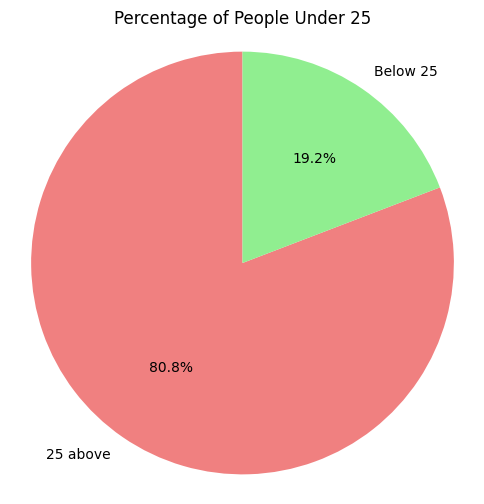

In [39]:
plt.figure(figsize=(6,6))
plt.pie(ages_data, labels=ages_data.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of People Under 25')
plt.axis('equal')
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

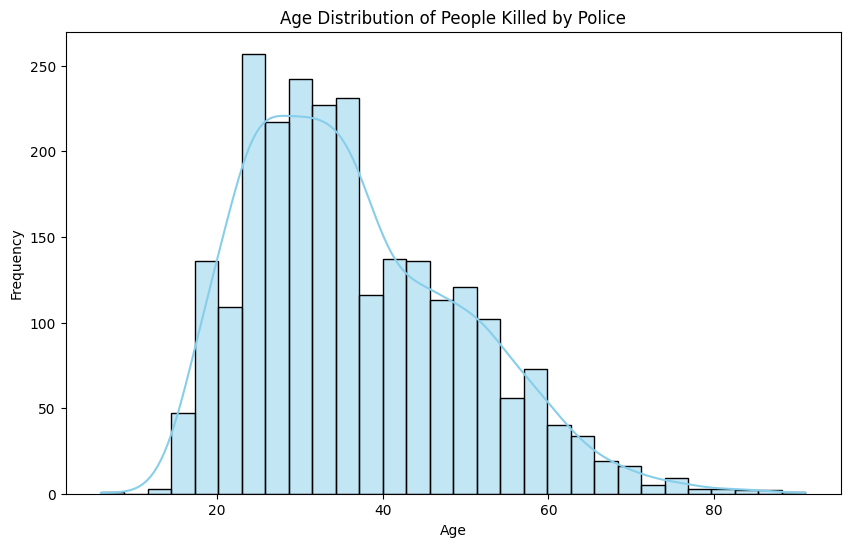

In [40]:
plt.figure(figsize=(10,6))

# Histogram + KDE plot
sns.histplot(df_fatalities['age'], kde=True, bins=30, color='skyblue')

plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

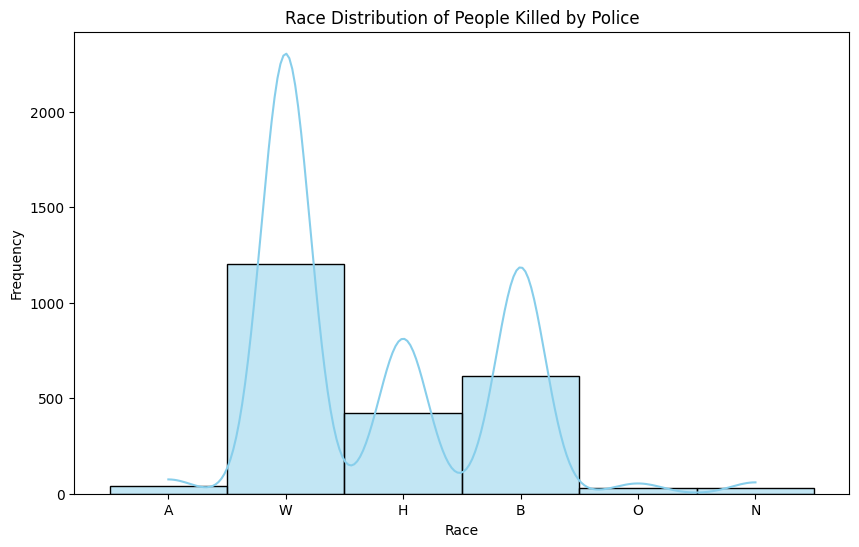

In [43]:
plt.figure(figsize=(10,6))

# Histogram + KDE plot
sns.histplot(df_fatalities['race'], kde=True, bins=30, color='skyblue')

plt.title('Race Distribution of People Killed by Police')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [45]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [51]:

race_data = df_fatalities.groupby('race').agg(count=('race', 'count')).reset_index()
race_data['race'].groupby(race_data['race']).count()
race_data.head()

,race,count
0,A,39
1,B,618
2,H,423
3,N,31
4,O,28


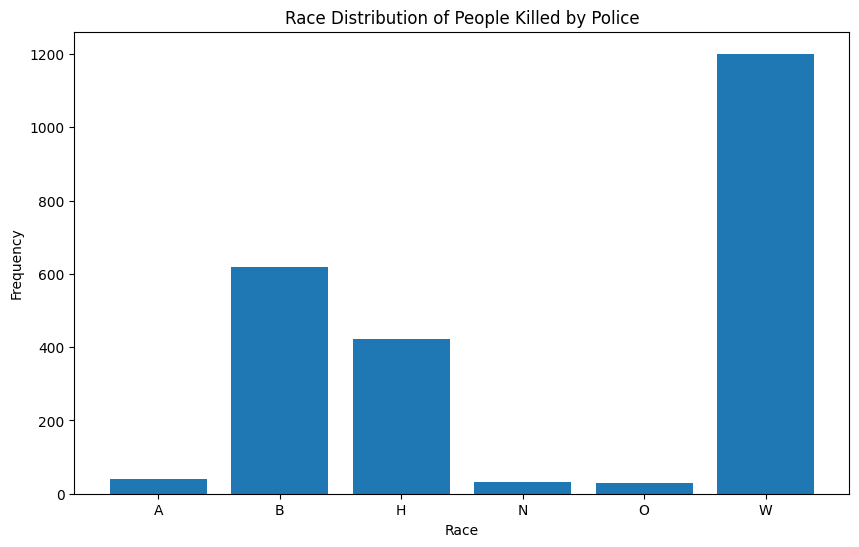

In [53]:
plt.figure(figsize=(10,6))

# Histogram + KDE plot
plt.bar(race_data['race'], race_data['count'])

plt.title('Race Distribution of People Killed by Police')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [55]:
mental_data = df_fatalities.groupby('signs_of_mental_illness').agg(count=('signs_of_mental_illness', 'count')).reset_index()
mental_data

,signs_of_mental_illness,count
0,False,1902
1,True,633


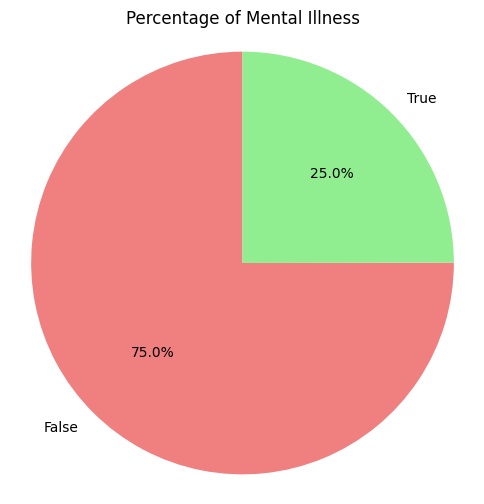

In [61]:
plt.figure(figsize=(6,6))
plt.pie(mental_data['count'], labels=mental_data['signs_of_mental_illness'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Mental Illness')
plt.axis('equal')
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [66]:
city_data = df_fatalities.groupby('city').agg(count=('city', 'count')).sort_values(by='count',ascending=False)
city_data

,count
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
...,...
Wink,1
Winnie,1
Winnsboro,1


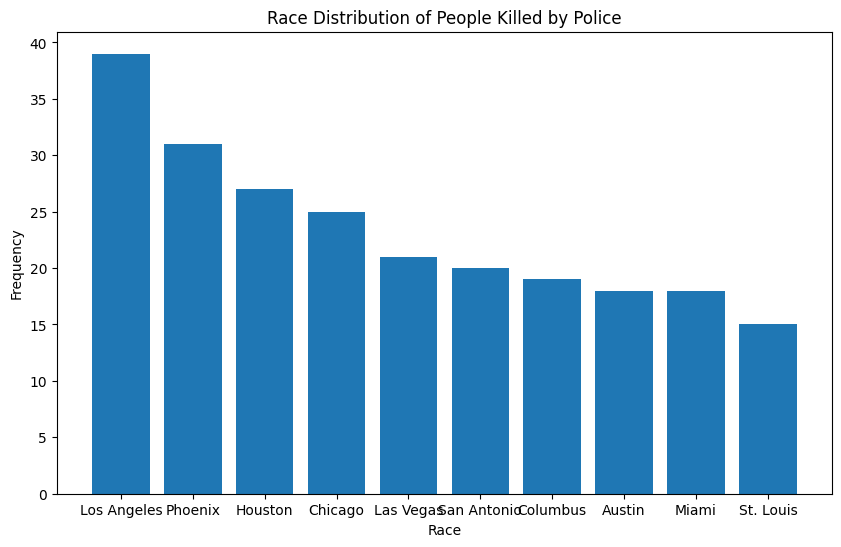

In [68]:
plt.figure(figsize=(10,6))

# Histogram + KDE plot
plt.bar(city_data.index[:10], city_data['count'][:10])

plt.title('Race Distribution of People Killed by Police')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [83]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], dayfirst=True, errors='coerce')

deaths_over_time = df_fatalities.groupby('date').size().reset_index(name='deaths')
deaths_monthly = df_fatalities.set_index('date').resample('M').size().reset_index(name='deaths')

/tmp/ipython-input-3740036176.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], dayfirst=True, errors='coerce')
/tmp/ipython-input-3740036176.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  deaths_monthly = df_fatalities.set_index('date').resample('M').size().reset_index(name='deaths')


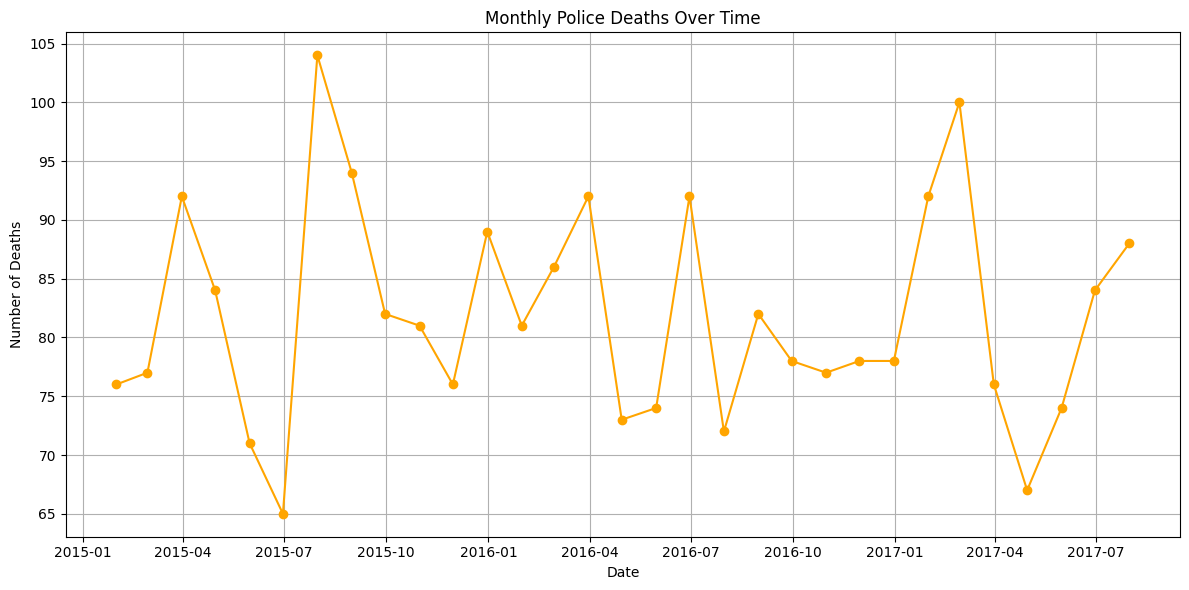

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).